In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

In [2]:
content_token_fin = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/content_token_fin2.csv", index_col=0)
content_token_fin

,date,content,category,rate_change,content_token,tokens_list
0,20050609,[edaily 김현동기자] 미국 뉴욕 맨해튼의 아파트 매매가격이 사상 최고가 행진을...,ED,0,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V...",부동산 가격 상승 가격 상승 우호적 가격 급등 완화
1,20050609,[edaily 하정민기자] 국제통화기금(IMF)이 유럽통화동맹(EMU) 체제 유지에...,ED,0,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']",ecb 금리 인하 경제 살
2,20050609,[뉴욕=edaily 정명수특파원] 다우 지수가 어렵게 강보합선을 지켰다. 나스닥은 ...,ED,0,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N...",fed 금리 인상 경고 fed 장기 금리 하락 금리 역전 경기 둔화 둔화 장기 금리...
3,20050609,"[뉴욕=edaily 정명수특파원] 앨런 그린스펀 의장이 지난 2월 ""장기 금리 하락...",ED,0,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN...",인상 장기 금리 인상 국채 수익률 급등 부동산 거품 우려 과열 금리 오르 경기 둔화...
4,20050609,[조선일보 제공] 세계 증시의 동조화(同調化)가 갈수록 뚜렷해지고 있다. 주요국들의...,ED,0,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성...",경제 성장 저해 않 금리 경제 성장 물가 상승 억제 금리 인상 멈추 전망 밝 않 상...
...,...,...,...,...,...,...
394867,20240711,[이데일리 최정희 기자] 한국은행은 영국 조기 총선으로 영란은행의 기준금리 인하 시...,ED,0,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N...",소비자 물가 상승률 하락 지표 발표 금리 인하 금리 인하 가능성 낮 금리 인하 가능...
394869,20240711,[이데일리 정두리 기자] KB국민은행은 서울 코엑스 D홀에서 ‘2024 제1차 KB...,ED,0,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']",중견 기업 성장 성장 크
394870,20240711,[이데일리 유준하 기자] NH투자증권은 27일 과거 미국 연방준비제도(Fed·연준)...,ED,0,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG...",금리 인하 전망 금리 인하 금리 인하 금리 인하 금리 인하 경기 침체 물가 상승률 ...
394871,20240711,[이데일리 이정윤 기자] 원·달러 환율이 1380원 부근까지 상승 출발했다. 소비자...,ED,0,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG...",금리 인하 예상 인하 역외 환율 반영 오르 불확실성 하락 금리 하향 하회


In [3]:
# 기준금리 발표일 list
announce_dates_raw = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/기준금리test.csv", encoding='euc-kr')
announce_date_list = list(announce_dates_raw.announce_date[4:-3])
ann_date_list = []
for announce_date in announce_date_list:
    announce_date = int(announce_date.replace("-",""))
    ann_date_list.append(announce_date)

ann_date_list

[20050609,
 20050707,
 20050811,
 20050908,
 20051011,
 20051110,
 20051208,
 20060112,
 20060209,
 20060309,
 20060407,
 20060511,
 20060608,
 20060707,
 20060810,
 20060907,
 20061012,
 20061109,
 20061207,
 20070111,
 20070208,
 20070308,
 20070412,
 20070510,
 20070608,
 20070712,
 20070809,
 20070907,
 20071011,
 20071108,
 20071207,
 20080110,
 20080213,
 20080307,
 20080410,
 20080508,
 20080612,
 20080710,
 20080807,
 20080911,
 20081009,
 20081027,
 20081107,
 20081211,
 20090109,
 20090212,
 20090312,
 20090409,
 20090512,
 20090611,
 20090709,
 20090811,
 20090910,
 20091009,
 20091112,
 20091210,
 20100108,
 20100211,
 20100311,
 20100409,
 20100512,
 20100610,
 20100709,
 20100812,
 20100909,
 20101014,
 20101116,
 20101209,
 20110113,
 20110211,
 20110310,
 20110412,
 20110513,
 20110610,
 20110714,
 20110811,
 20110908,
 20111013,
 20111111,
 20111208,
 20120113,
 20120209,
 20120308,
 20120413,
 20120510,
 20120608,
 20120712,
 20120809,
 20120913,
 20121011,
 20121109,

In [4]:
# announce date 별 극성 (20050609 ~ 20240711 / 0:변화x, 1:상승, 2:하락 (콜금리 기준))
polarity = '''
0
0
0
0
0
2
1
0
1
0
1
0
1
0
0
0
1
0
1
0
0
0
2
1
0
0
0
0
2
1
1
2
1
0
2
1
0
0
0
0
0
0
1
0
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
2
0
2
0
0
0
0
2
2
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
1
0
0
1
0
0
0
1
2
1
2
0
0
'''

In [5]:
# announce_date별 극성
x = ''.join(polarity.split('\n'))
polarity_list = [int(i) for i in x]
polarity_list = polarity_list[4:]
announce_date_polarity = pd.DataFrame(polarity_list, index=ann_date_list)
announce_date_polarity.rename(columns={0:'polarity'}, inplace=True)

In [6]:
# 극성별 announce date 목록

def date_by_polarity(announce_date_polarity, n):
    pol = announce_date_polarity[announce_date_polarity.polarity==n]
    return list(pol.index)

pol_0 = date_by_polarity(announce_date_polarity,0)
pol_1 = date_by_polarity(announce_date_polarity,1)
pol_2 = date_by_polarity(announce_date_polarity,2)


In [7]:
pol_1

[20050811,
 20051011,
 20051208,
 20060209,
 20060608,
 20060810,
 20070111,
 20070712,
 20070809,
 20071011,
 20080110,
 20080807,
 20100709,
 20101116,
 20110113,
 20110310,
 20110610,
 20171130,
 20181130,
 20210715,
 20210826,
 20211125,
 20220114,
 20220526,
 20220713,
 20220825,
 20221012,
 20221124,
 20230113,
 20230525,
 20231130,
 20240222]

In [8]:
# 극성 pol 인 기간의 토큰들
def tok2list_bydate(content_token_fin, date_by_pol):
    t_list = []
    for date in date_by_pol:
        temp = content_token_fin[content_token_fin.date==date].content_token
        for i in temp:
            t_list.extend(eval(i))
    return t_list

In [9]:
t_list_0 = tok2list_bydate(content_token_fin, pol_0)
t_list_1 = tok2list_bydate(content_token_fin, pol_1)
t_list_2 = tok2list_bydate(content_token_fin, pol_2)

In [10]:
# 토큰 품사 제거처리 ex)'가격/NNG;상승/NNG' -> '가격 상승'
def token_list_ftn(t_list):

    token_list = []

    for t in t_list:
        token = t
        while token.find(';') > 0:
            token = token.replace(token[token.find('/'):token.find(';')+1], ' ')

        token = token.replace(token[token.find('/'):], '')

        token_list.append(token)

    return token_list

In [11]:
token_list_0 = token_list_ftn(t_list_0)
token_list_1 = token_list_ftn(t_list_1)
token_list_2 = token_list_ftn(t_list_2)

In [12]:
# 특정 극성인 기간의 토큰별 count list
def count_dict_ftn(token_list):

    unique_temp = list(set(token_list))
    count_dict = {i:0 for i in unique_temp}

    for token in token_list:
        count_dict[token] += 1

    return count_dict

In [13]:
count_dict_0 = count_dict_ftn(token_list_0)
count_dict_1 = count_dict_ftn(token_list_1)
count_dict_2 = count_dict_ftn(token_list_2)

In [14]:
# count_dict에 기록된 단어 빈도수에 따른 워드클라우드
def count_dict2wc(count_dict):
    wordcloud = WordCloud(width=1000, height=600, background_color='white', random_state=0,font_path='gulim').generate_from_frequencies(frequencies=count_dict)
    plt.rc('font', family='D2Coding')
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()

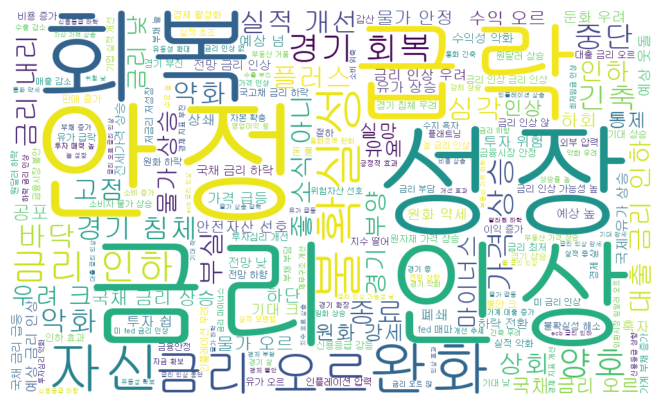

In [15]:
count_dict2wc(count_dict_0)

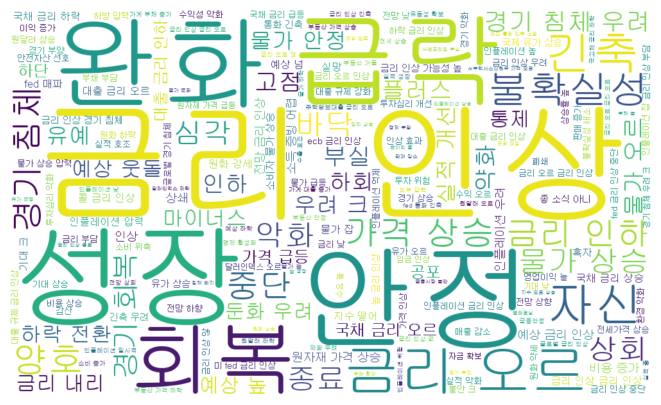

In [16]:
count_dict2wc(count_dict_1)

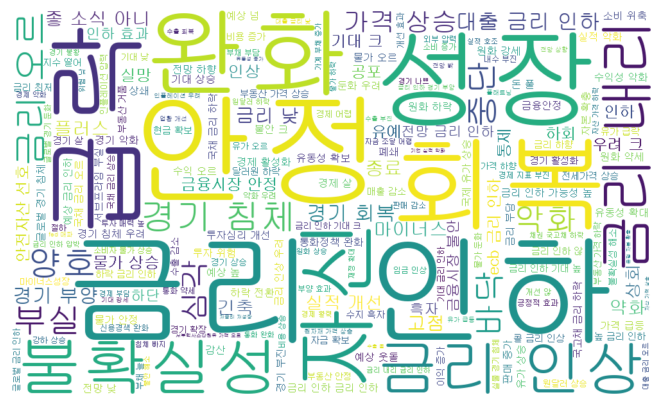

In [18]:
count_dict2wc(count_dict_2)

---

In [19]:
content_token_fin

,date,content,category,rate_change,content_token,tokens_list
0,20050609,[edaily 김현동기자] 미국 뉴욕 맨해튼의 아파트 매매가격이 사상 최고가 행진을...,ED,0,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V...",부동산 가격 상승 가격 상승 우호적 가격 급등 완화
1,20050609,[edaily 하정민기자] 국제통화기금(IMF)이 유럽통화동맹(EMU) 체제 유지에...,ED,0,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']",ecb 금리 인하 경제 살
2,20050609,[뉴욕=edaily 정명수특파원] 다우 지수가 어렵게 강보합선을 지켰다. 나스닥은 ...,ED,0,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N...",fed 금리 인상 경고 fed 장기 금리 하락 금리 역전 경기 둔화 둔화 장기 금리...
3,20050609,"[뉴욕=edaily 정명수특파원] 앨런 그린스펀 의장이 지난 2월 ""장기 금리 하락...",ED,0,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN...",인상 장기 금리 인상 국채 수익률 급등 부동산 거품 우려 과열 금리 오르 경기 둔화...
4,20050609,[조선일보 제공] 세계 증시의 동조화(同調化)가 갈수록 뚜렷해지고 있다. 주요국들의...,ED,0,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성...",경제 성장 저해 않 금리 경제 성장 물가 상승 억제 금리 인상 멈추 전망 밝 않 상...
...,...,...,...,...,...,...
394867,20240711,[이데일리 최정희 기자] 한국은행은 영국 조기 총선으로 영란은행의 기준금리 인하 시...,ED,0,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N...",소비자 물가 상승률 하락 지표 발표 금리 인하 금리 인하 가능성 낮 금리 인하 가능...
394869,20240711,[이데일리 정두리 기자] KB국민은행은 서울 코엑스 D홀에서 ‘2024 제1차 KB...,ED,0,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']",중견 기업 성장 성장 크
394870,20240711,[이데일리 유준하 기자] NH투자증권은 27일 과거 미국 연방준비제도(Fed·연준)...,ED,0,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG...",금리 인하 전망 금리 인하 금리 인하 금리 인하 금리 인하 경기 침체 물가 상승률 ...
394871,20240711,[이데일리 이정윤 기자] 원·달러 환율이 1380원 부근까지 상승 출발했다. 소비자...,ED,0,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG...",금리 인하 예상 인하 역외 환율 반영 오르 불확실성 하락 금리 하향 하회


In [20]:
count_dict_0

{'가격 이평선 하회': 2,
 '부양책 상승': 42,
 'fed 통화정책 우려': 20,
 '펀더멘털 둔화': 62,
 '고용 증가 소득 증가': 4,
 'fed 금리 인상 가능성 높': 426,
 '투자심리 무너': 11,
 '쉽 해소 어렵': 29,
 '재무 악화': 170,
 '안정 위험자산 선호': 19,
 '불안요인 높': 7,
 '작 위험': 100,
 '기대 금리 상승 압력': 8,
 '부채 상환 부담 증대': 7,
 '물량 상승 줄': 9,
 '경제 서서히 살': 21,
 '국고채 시장 안정': 6,
 '자금 유출 가속': 52,
 '금리 인하 필요 아니': 14,
 '금리 인상 우려 꺾': 10,
 '수요측면 상승 압력': 18,
 '개선 가격 상승': 35,
 '개선 늦': 23,
 '지표 부진 벗어나 못하': 5,
 '금리 인상 입주 물량 증가': 47,
 '자신 가지 못하': 18,
 '소비자 물가 상승률 밑돌': 19,
 '정책 회복': 26,
 '금융시장 관심 높': 14,
 '기대 커브 플래트닝': 3,
 '가격 급등 금리 인상': 50,
 '물가 부정적': 33,
 '선행 지수 하락 경기 모멘텀': 5,
 '국채 금리 상승 압력': 83,
 '변동성 강세': 19,
 '소득 증가율 웃돌': 30,
 '회사채 금리 오르': 320,
 '통화 위안 절상': 9,
 '글로벌 정책 공조 금리 인하': 3,
 '약하 가능성 높': 45,
 '인상 경기 확장': 32,
 '예상 낮 금리 인상': 24,
 '국고채 매수 강하': 1,
 '금리 내리 금리 인상': 69,
 '채권 발행 많 않': 9,
 '은행 가계 대출 억제': 20,
 '고용 호전': 36,
 '활성화 경기 회복': 26,
 '유로달러 밀리': 14,
 '지준율 상향': 69,
 '그럼에도 금리 오르': 8,
 '소비자 기대 지수 개선': 6,
 '재고 많': 44,
 '둔화 금리 인상': 290,
 '기업 이익 모멘텀': 142,
 '수지 흑자 감소': 71,
 '국고채 

In [21]:
# count_dict의 상위 N개 토큰 그래프
def topNgraph(count_dict, N):
    topNitems = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True)[:N])
    plt.figure(figsize=(100, 50))
    plt.bar(list(topNitems.keys()), list(topNitems.values()))
    plt.xticks(rotation=45)
    plt.xticks(fontsize=70)
    plt.yticks(fontsize=70)
    plt.show()

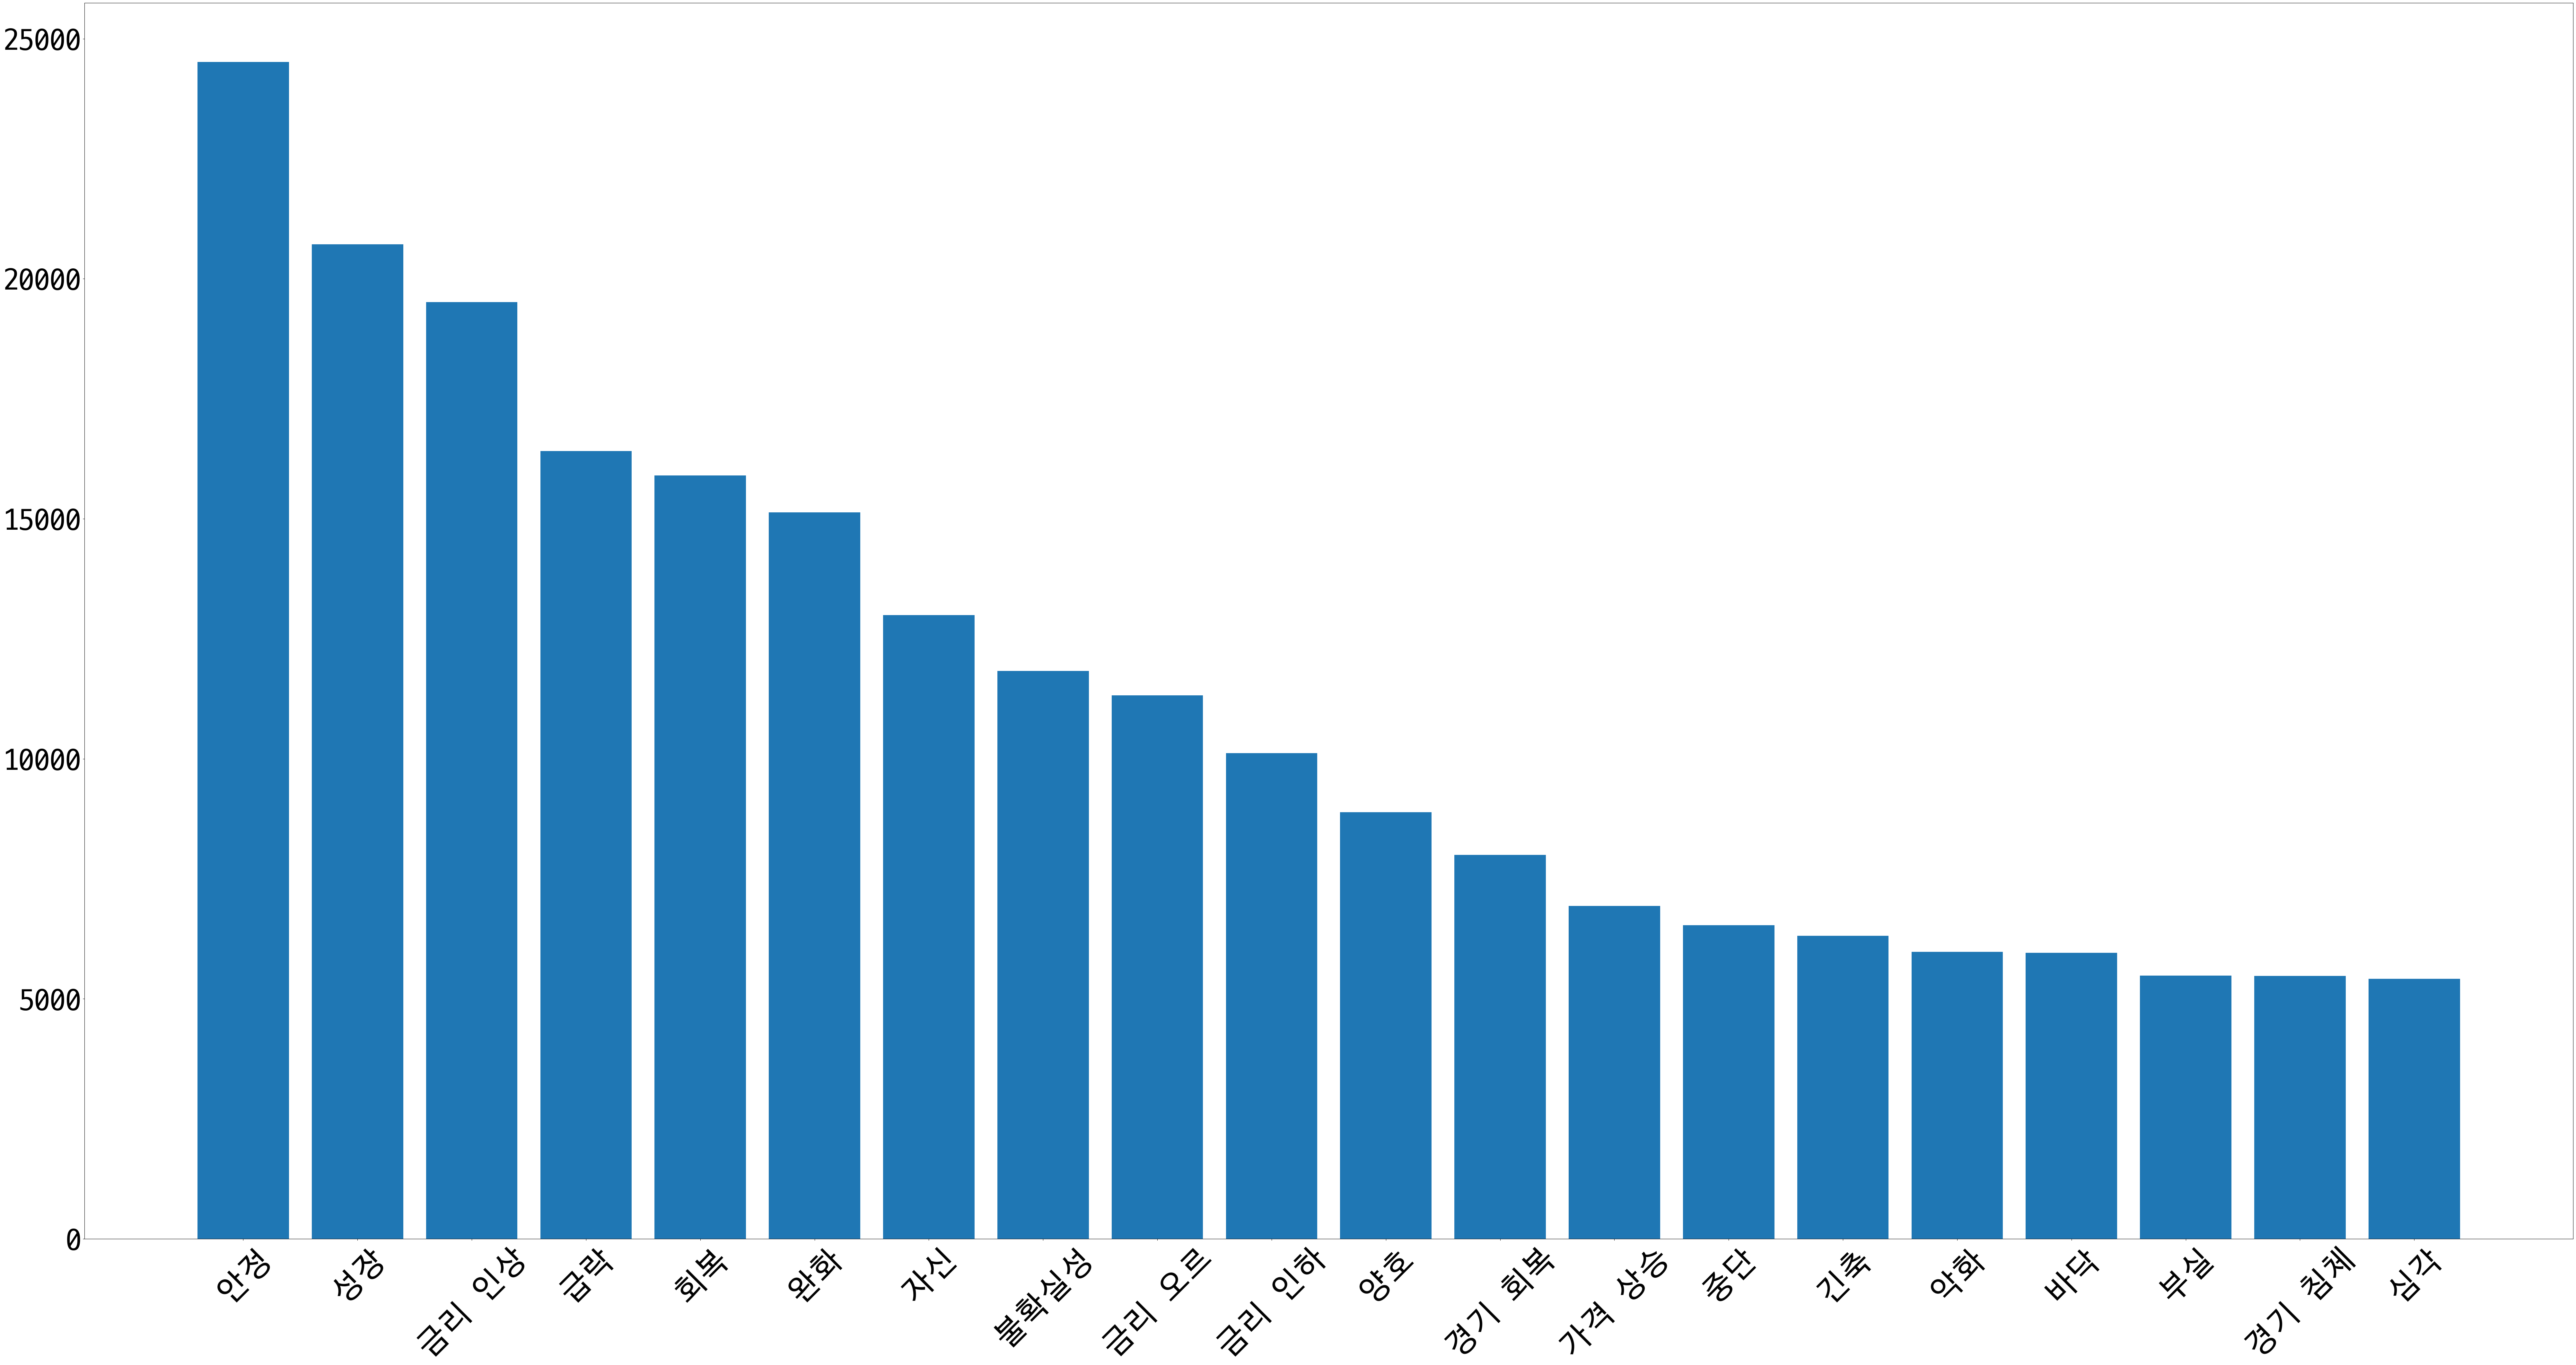

In [22]:
topNgraph(count_dict_0, 20)

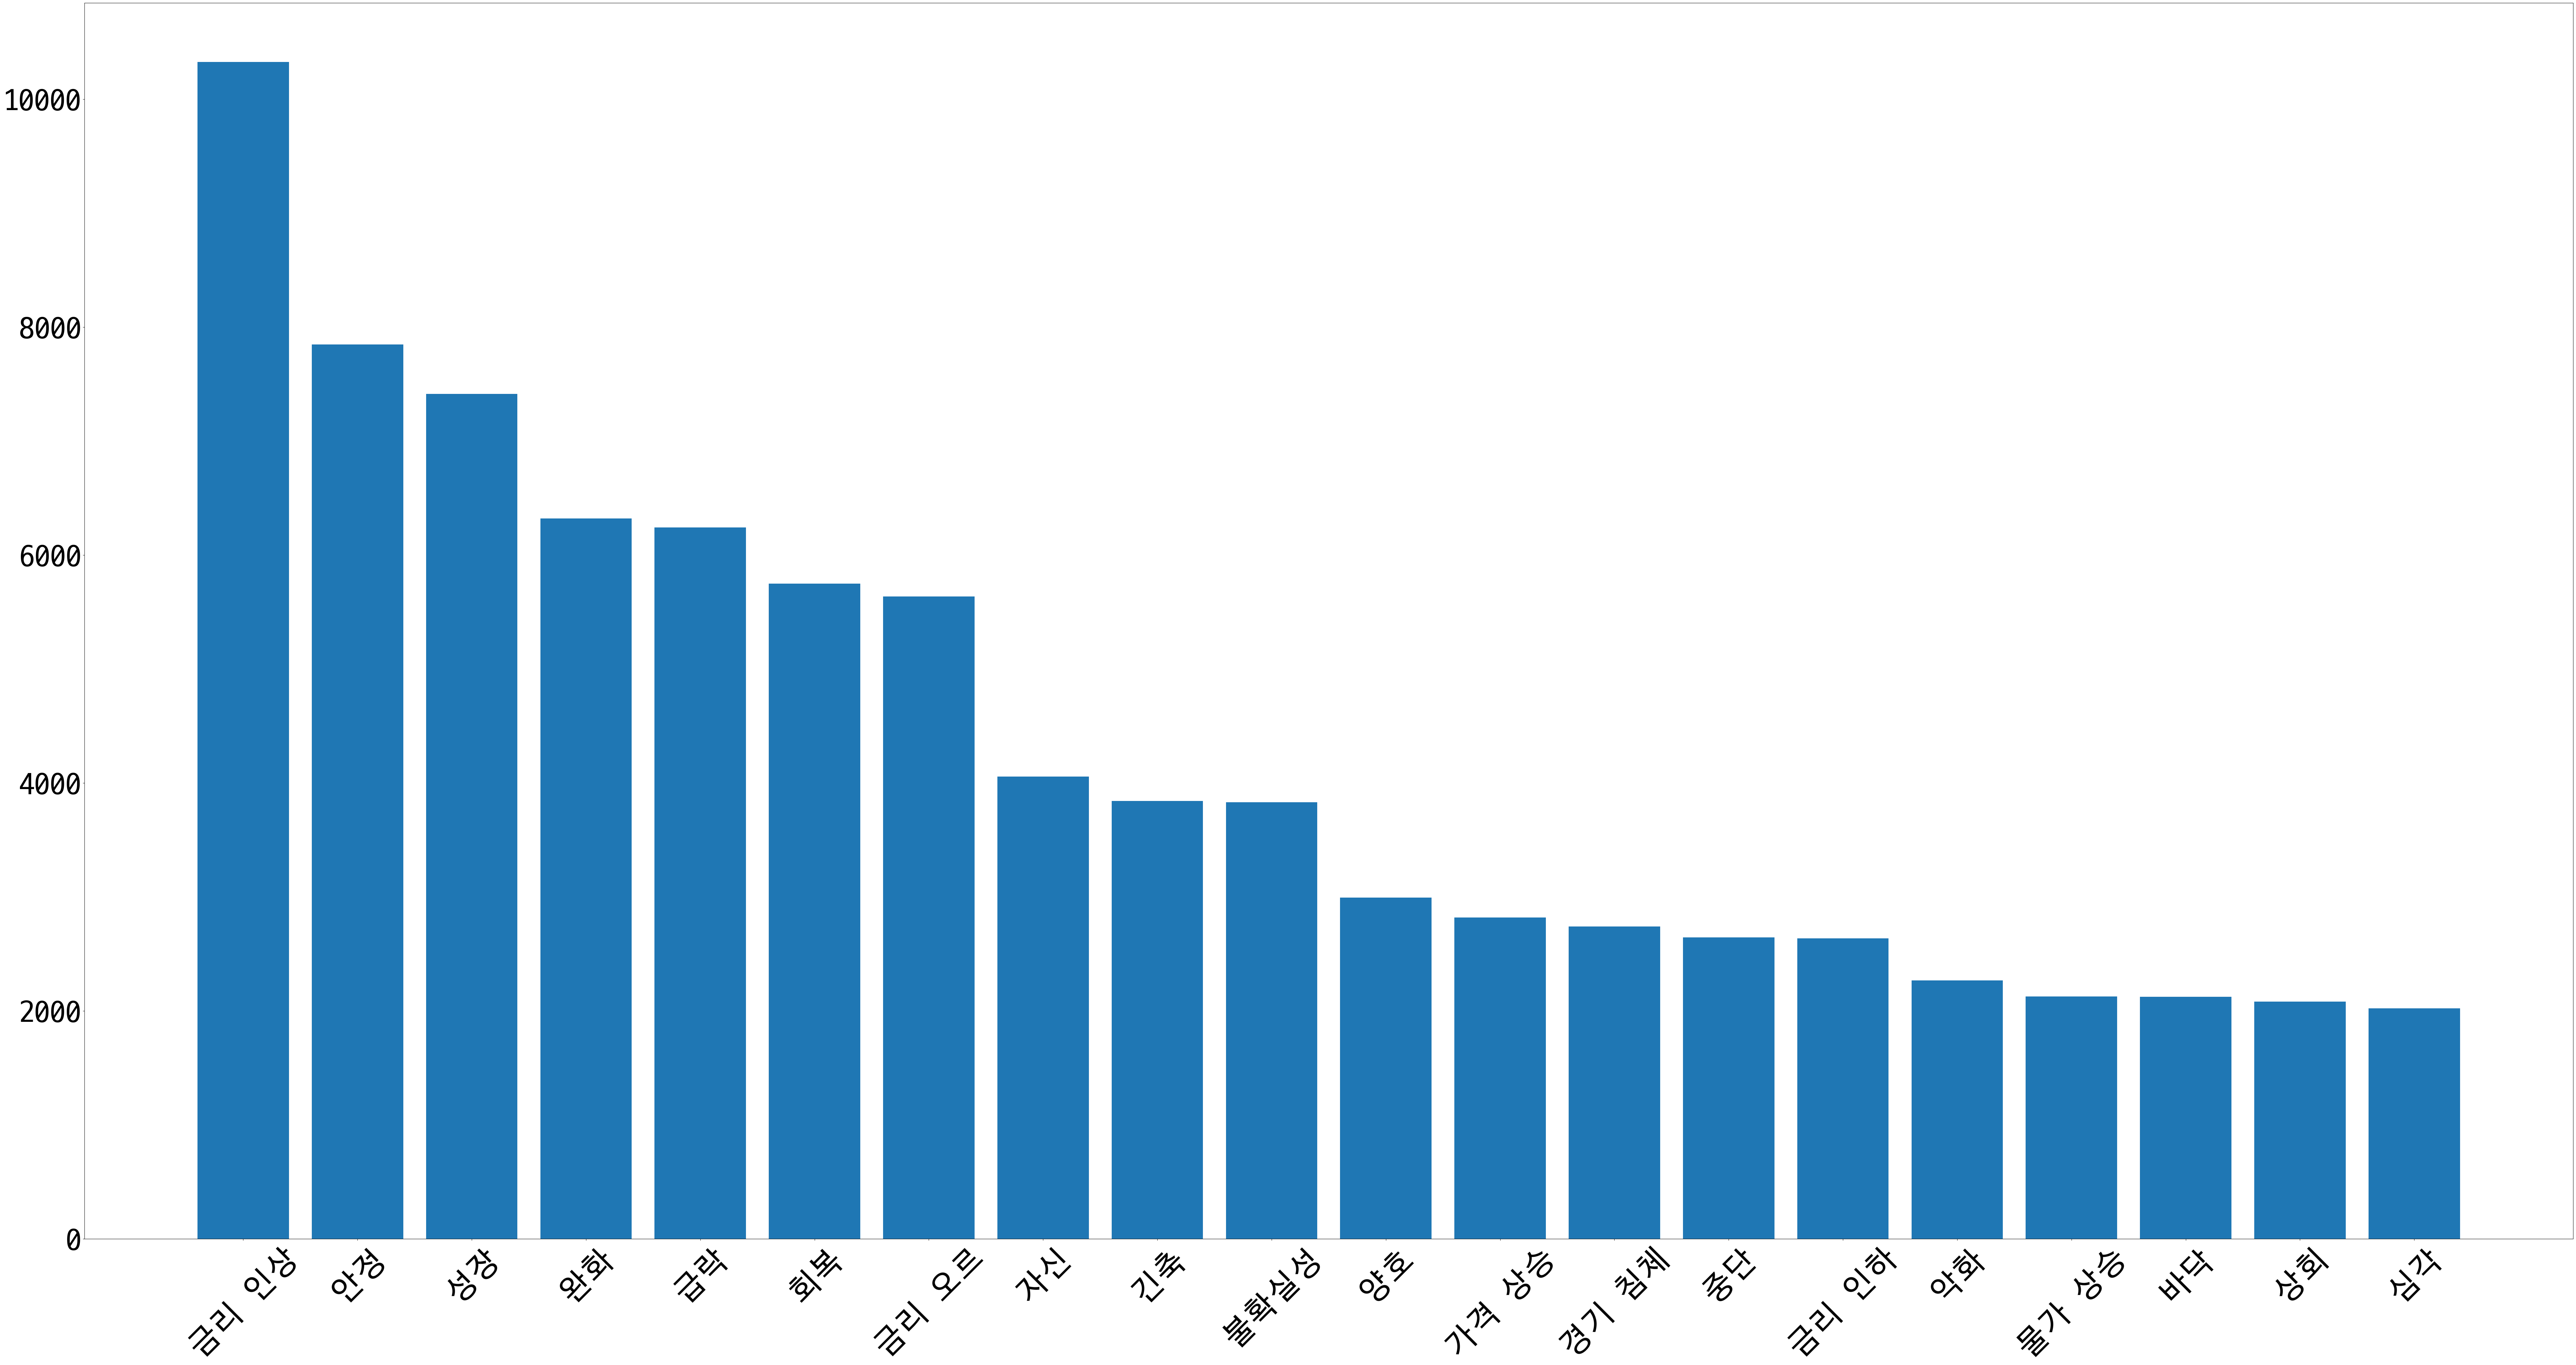

In [23]:
topNgraph(count_dict_1, 20)

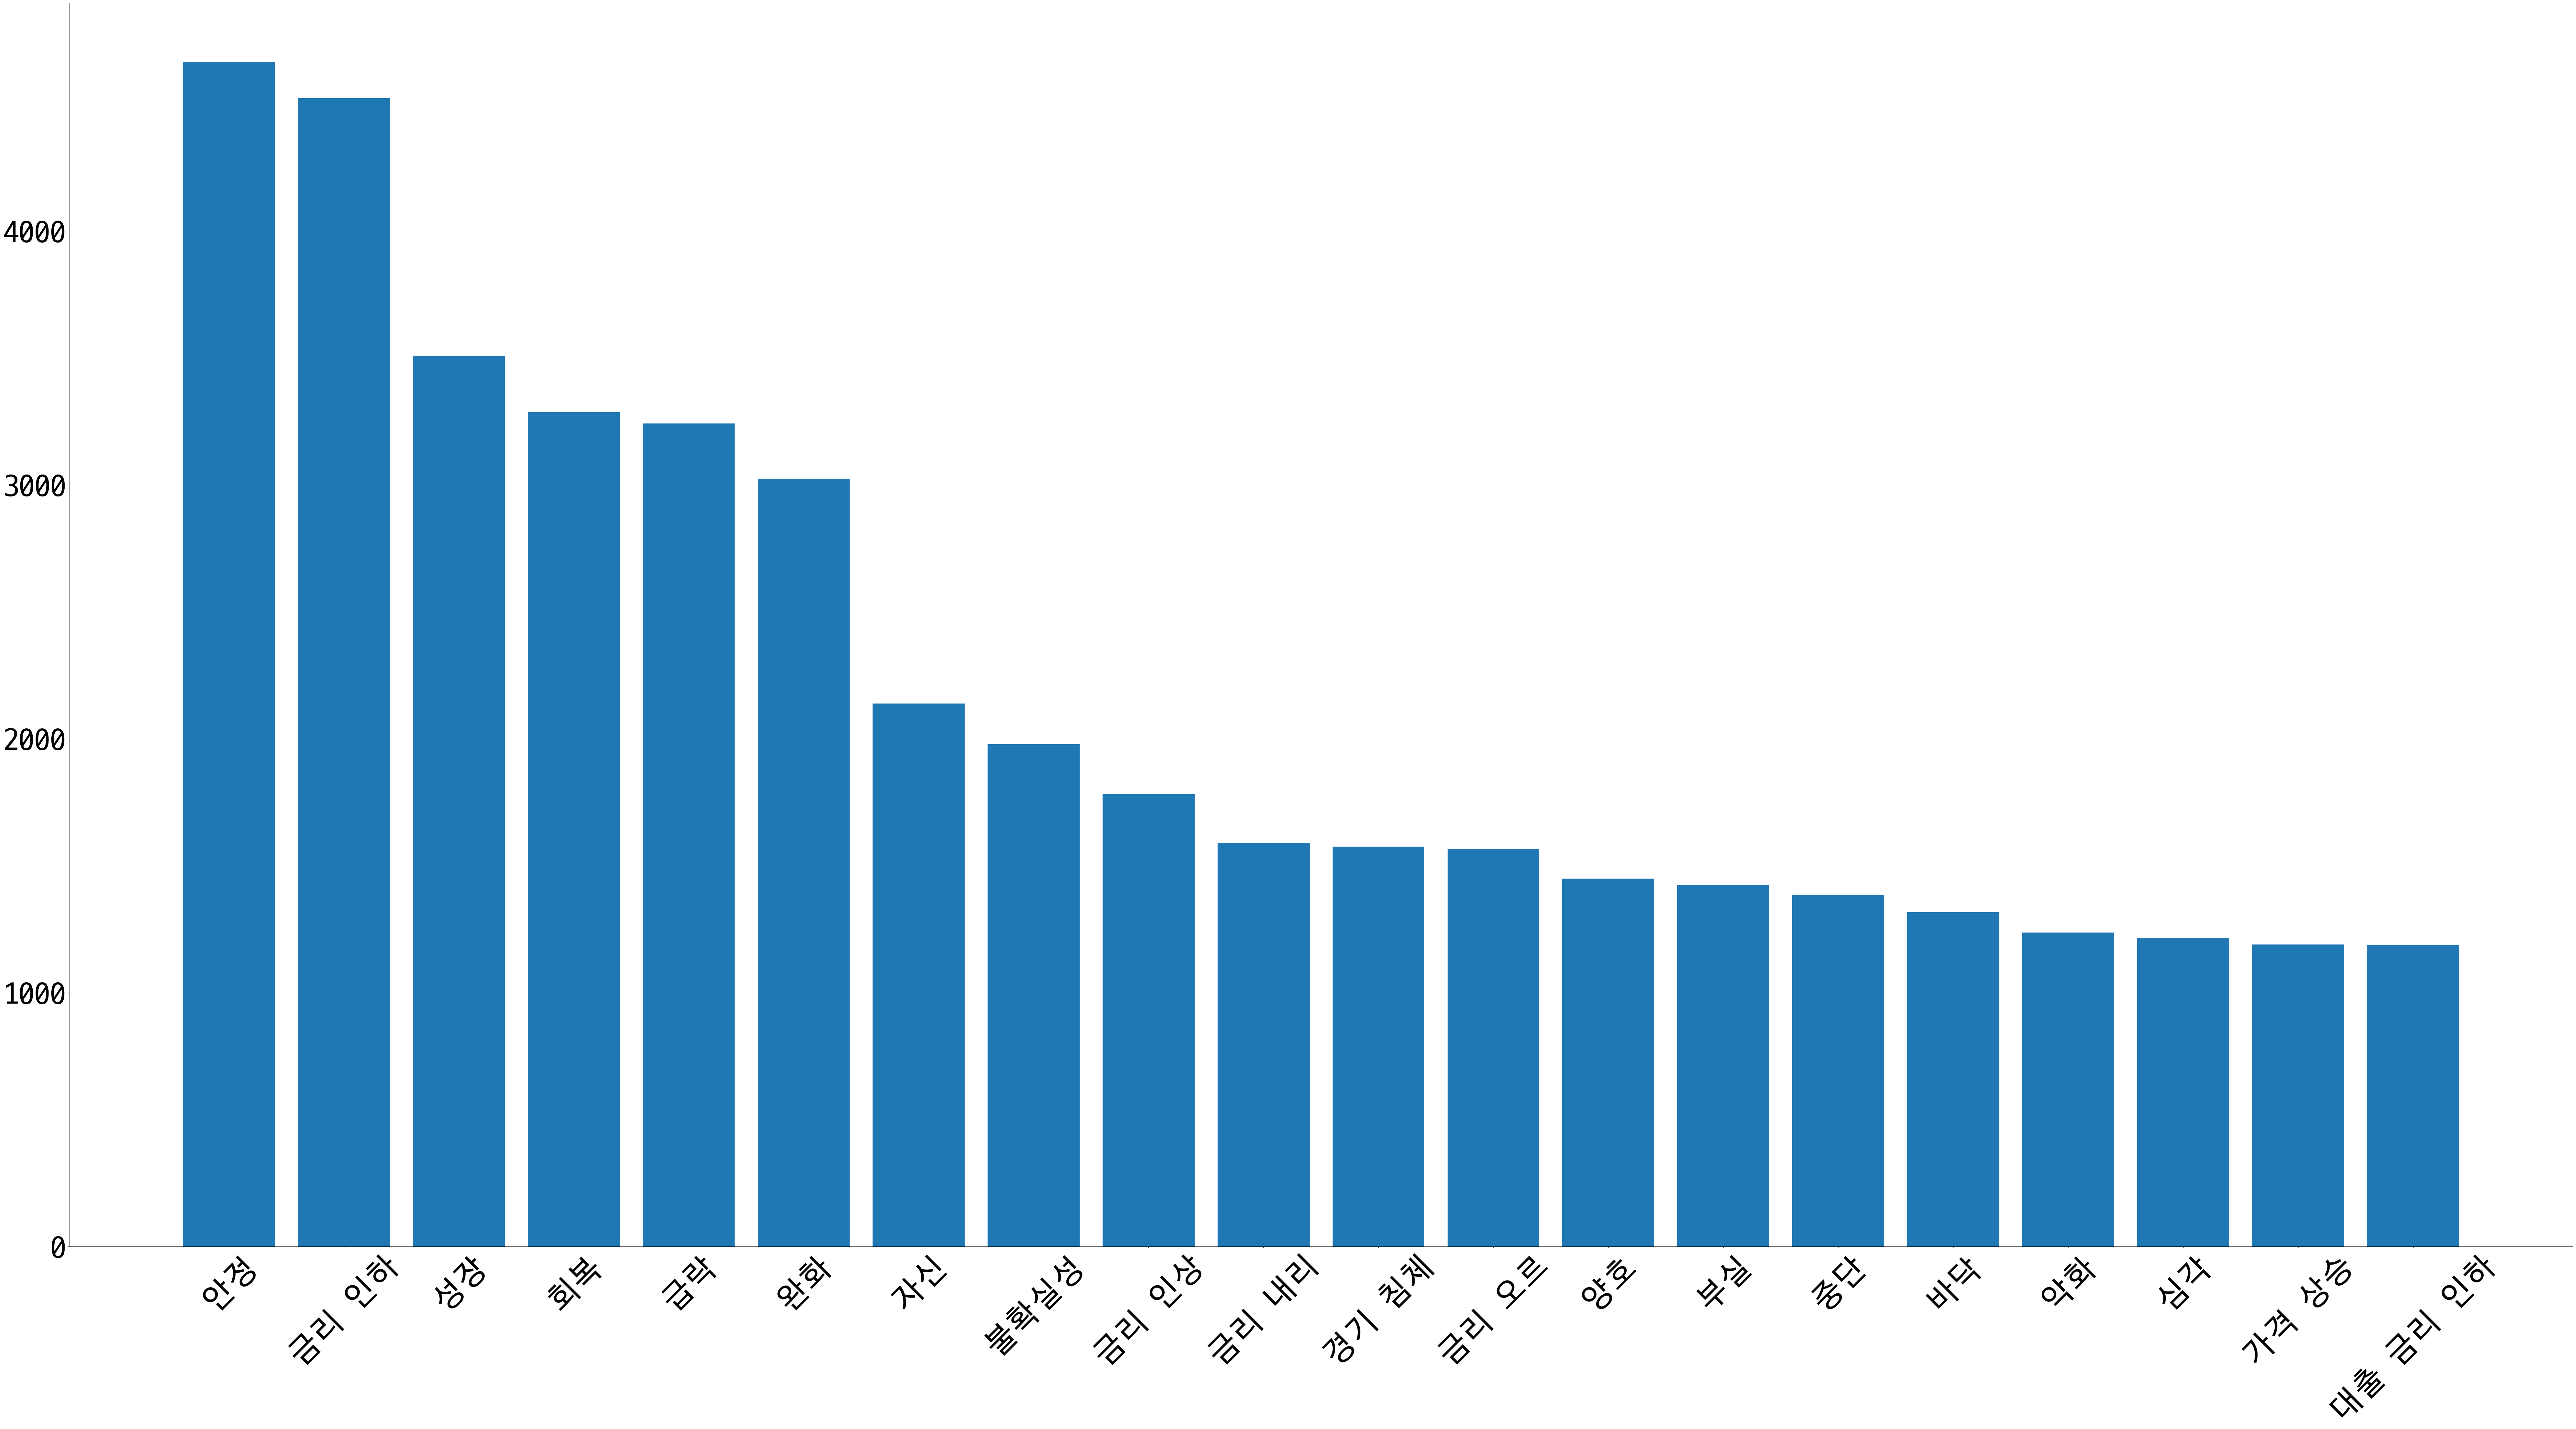

In [24]:
topNgraph(count_dict_2, 20)

---

In [25]:
content_token_fin

,date,content,category,rate_change,content_token,tokens_list
0,20050609,[edaily 김현동기자] 미국 뉴욕 맨해튼의 아파트 매매가격이 사상 최고가 행진을...,ED,0,"['부동산/NNG;가격/NNG;상승/NNG', '가격/NNG;상승/NNG;우호적/V...",부동산 가격 상승 가격 상승 우호적 가격 급등 완화
1,20050609,[edaily 하정민기자] 국제통화기금(IMF)이 유럽통화동맹(EMU) 체제 유지에...,ED,0,"['ecb/NNG;금리/NNG;인하/NNG', '경제/NNG;살/VV']",ecb 금리 인하 경제 살
2,20050609,[뉴욕=edaily 정명수특파원] 다우 지수가 어렵게 강보합선을 지켰다. 나스닥은 ...,ED,0,"['fed/NNG;금리/NNG;인상/NNG;경고/NNG', 'fed/NNG;장기/N...",fed 금리 인상 경고 fed 장기 금리 하락 금리 역전 경기 둔화 둔화 장기 금리...
3,20050609,"[뉴욕=edaily 정명수특파원] 앨런 그린스펀 의장이 지난 2월 ""장기 금리 하락...",ED,0,"['인상/NNG;장기/NNG;금리/NNG;인상/NNG', '국채/NNG;수익률/NN...",인상 장기 금리 인상 국채 수익률 급등 부동산 거품 우려 과열 금리 오르 경기 둔화...
4,20050609,[조선일보 제공] 세계 증시의 동조화(同調化)가 갈수록 뚜렷해지고 있다. 주요국들의...,ED,0,"['경제/NNG;성장/NNG;저해/NNG;않/VX', '금리/NNG;경제/NNG;성...",경제 성장 저해 않 금리 경제 성장 물가 상승 억제 금리 인상 멈추 전망 밝 않 상...
...,...,...,...,...,...,...
394867,20240711,[이데일리 최정희 기자] 한국은행은 영국 조기 총선으로 영란은행의 기준금리 인하 시...,ED,0,"['소비자/NNG;물가/NNG;상승률/NNG;하락/NNG', '지표/NNG;발표/N...",소비자 물가 상승률 하락 지표 발표 금리 인하 금리 인하 가능성 낮 금리 인하 가능...
394869,20240711,[이데일리 정두리 기자] KB국민은행은 서울 코엑스 D홀에서 ‘2024 제1차 KB...,ED,0,"['중견/NNG;기업/NNG;성장/NNG', '성장/NNG;크/VV']",중견 기업 성장 성장 크
394870,20240711,[이데일리 유준하 기자] NH투자증권은 27일 과거 미국 연방준비제도(Fed·연준)...,ED,0,"['금리/NNG;인하/NNG;전망/NNG;금리/NNG;인하/NNG', '금리/NNG...",금리 인하 전망 금리 인하 금리 인하 금리 인하 금리 인하 경기 침체 물가 상승률 ...
394871,20240711,[이데일리 이정윤 기자] 원·달러 환율이 1380원 부근까지 상승 출발했다. 소비자...,ED,0,"['금리/NNG;인하/NNG;예상/NNG;인하/NNG', '역외/NNG;환율/NNG...",금리 인하 예상 인하 역외 환율 반영 오르 불확실성 하락 금리 하향 하회


<BarContainer object of 4 artists>

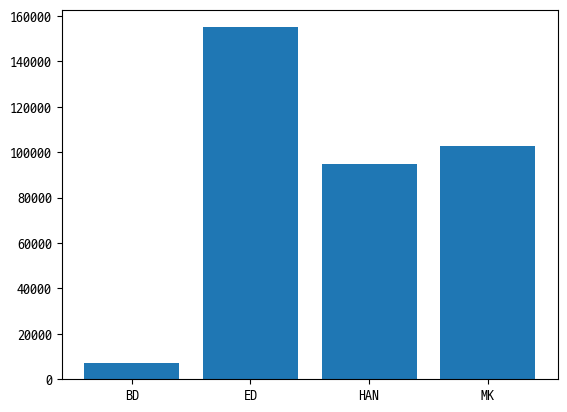

In [26]:
# category별 문서 수 (BD/ED/HAN/MK -> 채권분석보고서/이데일리/한경/매경)
grouped = content_token_fin.groupby('category')
result = grouped['content'].agg(['count'])
plt.bar(result.index, result['count'])

<Axes: xlabel='rate_change', ylabel='count'>

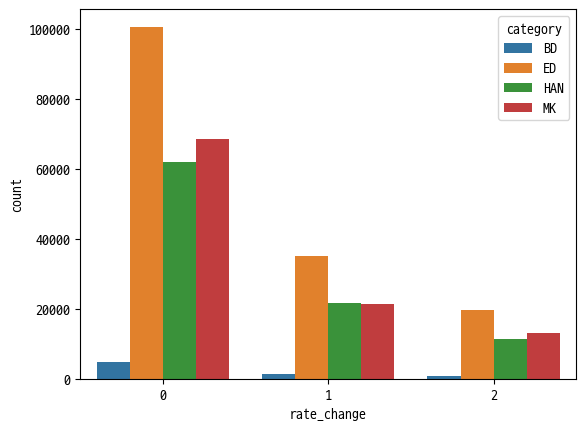

In [27]:
# 극성 및 category별 문서 수
grouped2 = content_token_fin.groupby(['category', 'rate_change'])
result2 = grouped2['rate_change'].agg(['count'])
result2

sns.barplot(data=result2, x='rate_change', y='count', hue='category')

In [29]:
print(len(pol_0), len(pol_1), len(pol_2))

144 32 26


In [28]:
# 단위 기간당 극성별 문서 수 
divisors = {0: len(pol_0), 1: len(pol_1), 2: len(pol_2)}
result3 = result2.copy()
for rate_change, divisor in divisors.items():
    result3.loc[(slice(None), rate_change), 'count'] /= divisor

result3

count
category rate_change             
BD       0              33.833333
         1              45.593750
         2              33.538462
ED       0             698.173611
         1            1093.468750
         2             750.346154
HAN      0             429.118056
         1             675.062500
         2             440.076923
MK       0             475.229167
         1             663.937500
         2             500.115385

<Axes: xlabel='rate_change', ylabel='count'>

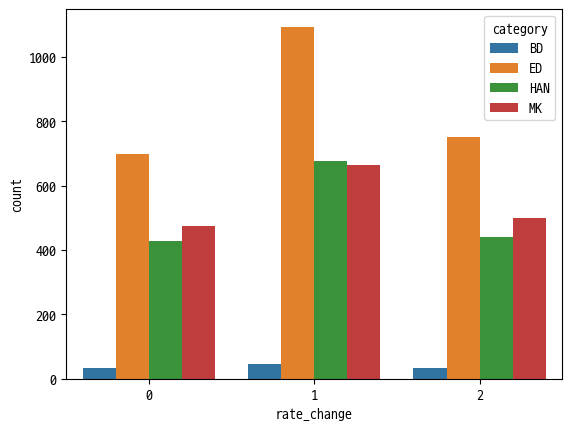

In [30]:
# 단위 기간당 극성별 문서 수 그래프(category별)
sns.barplot(data=result3, x='rate_change', y='count', hue='category')

<Axes: xlabel='rate_change', ylabel='count'>

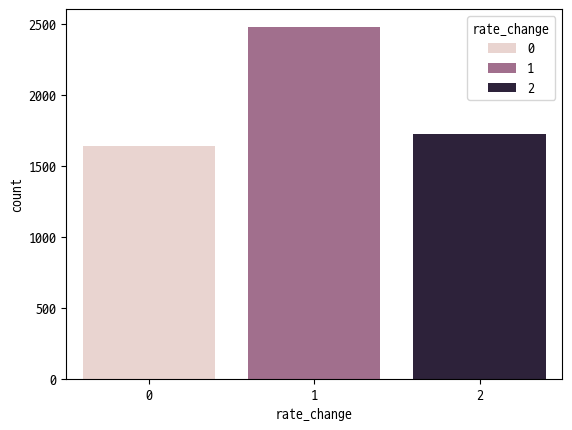

In [31]:
# 단위 기간당 극성별 문서 수(총합)
result3.groupby('rate_change').agg('sum')
sns.barplot(data=result3.groupby('rate_change').agg('sum'), x='rate_change', y='count', hue='rate_change')

In [32]:
# category별 문서당 평균 토큰 수
BD_len_list = []
for i in content_token_fin[content_token_fin['category']=='BD'].content_token:
    BD_len_list.append(len(eval(i)))

ED_len_list = []
for i in content_token_fin[content_token_fin['category']=='ED'].content_token:
    ED_len_list.append(len(eval(i)))

HAN_len_list = []
for i in content_token_fin[content_token_fin['category']=='HAN'].content_token:
    HAN_len_list.append(len(eval(i)))

MK_len_list = []
for i in content_token_fin[content_token_fin['category']=='MK'].content_token:
    MK_len_list.append(len(eval(i)))

a=sum(BD_len_list)/len(BD_len_list)
b=sum(ED_len_list) / len(ED_len_list)
c=sum(HAN_len_list)/len(HAN_len_list)
d=sum(MK_len_list)/len(MK_len_list)
a, b, c, d

(29.410939886158545, 8.395737791623935, 8.137963031306347, 7.241327593930777)

---

In [4]:
updated_df_token = pd.read_csv("C:/Users/SesacPython/Downloads/updated_df_token.csv")
pred = updated_df_token.groupby(['date', 'predicted_rate_change']).agg('count').content
pred = pd.DataFrame(pred)
vals = pred.groupby('date').idxmax().values
l = len(vals)
pred_list = [vals[i][0][1] for i in range(l)]

In [5]:
pred

content
date     predicted_rate_change         
20050609 0                          381
         1                          576
         2                          318
20050707 0                          188
         1                          777
...                                 ...
20240523 1                         1915
         2                         1167
20240711 0                          657
         1                         1838
         2                         1607

[606 rows x 1 columns]

In [6]:
# 기준금리 + 예측
base_rate = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/기준금리test.csv", encoding='euc-kr')
base_rate = base_rate.iloc[4:-3].reset_index(drop=True)
base_rate['pred'] = pred_list

# 콜금리 + 예측
call_rate = pd.read_csv("C:/Users/SesacPython/Desktop/dataset/금리예측프로젝트/콜금리test.csv")
call_rate.rename(columns={'Unnamed: 1':'rate', 'Unnamed: 2':'rate_change'}, inplace=True)
call_rate.drop(columns='Unnamed: 3', inplace=True)
call_rate['pred'] = pred_list

# 콜금리 날짜 형식 수정 (20010101 -> '2001-01-01')
annli = list(call_rate['announce_date'])
strdate = [( str(i)[:4] + '-' + str(i)[4:6] + '-' + str(i)[6:] ) for i in annli]
call_rate['announce_date'] = strdate

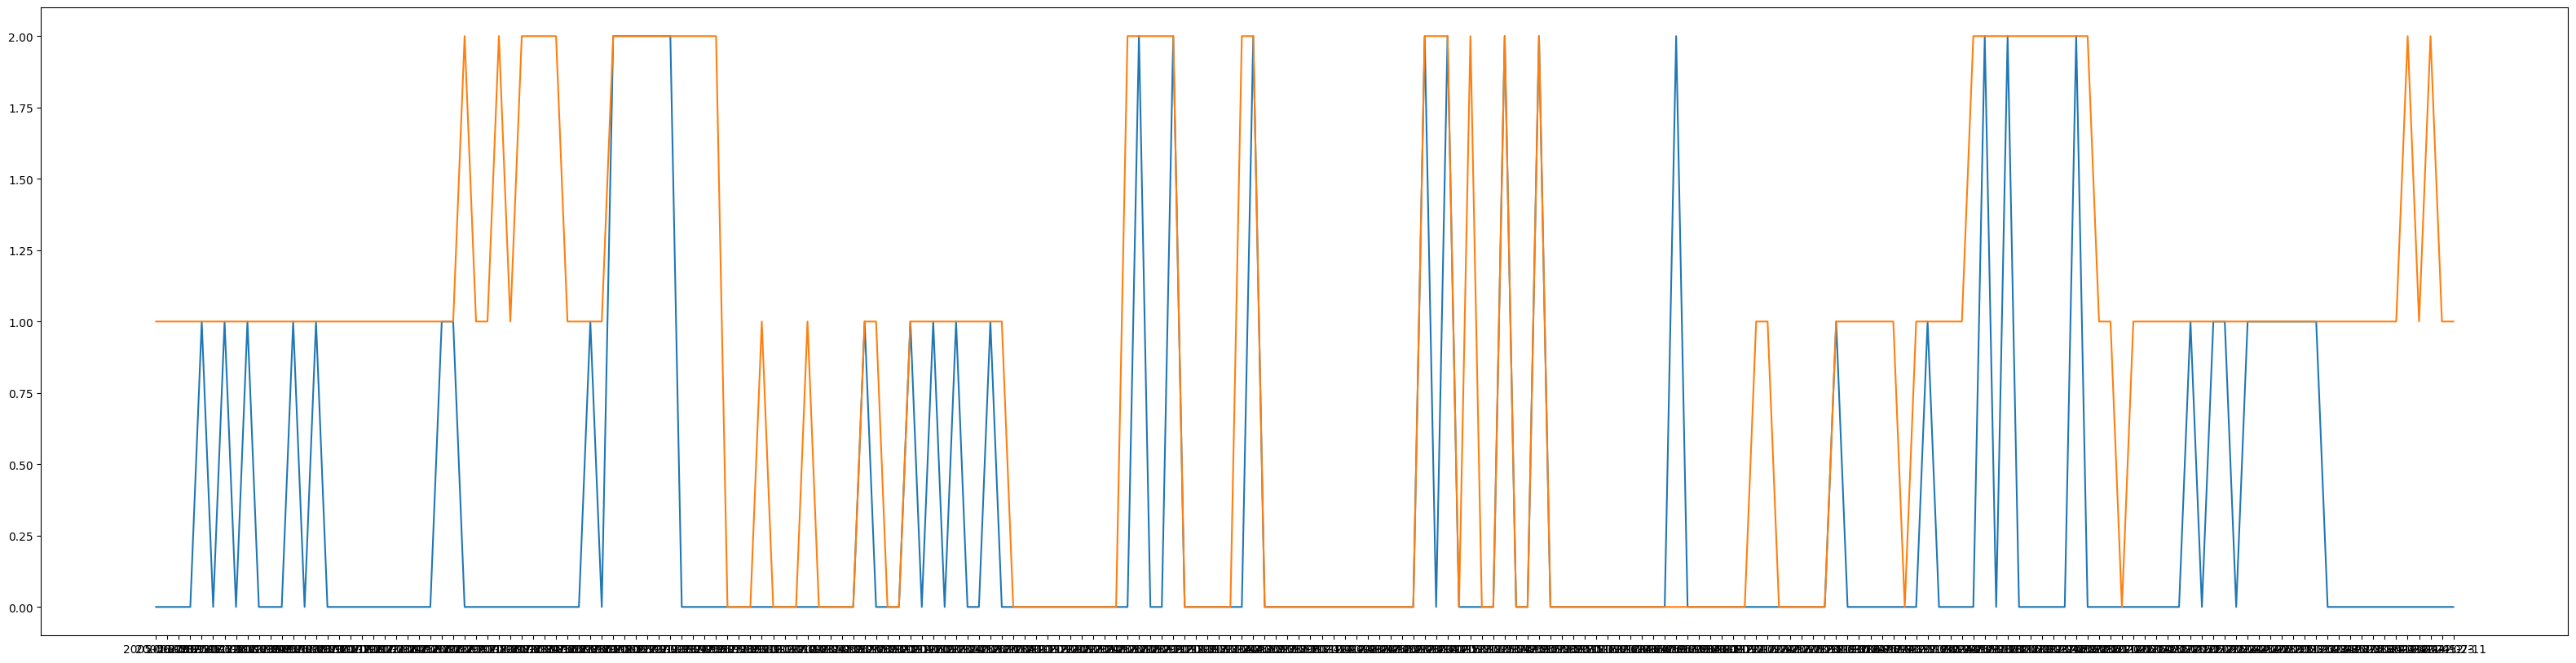

In [7]:
plt.figure(figsize=(40,10))
plt.plot(base_rate['announce_date'], base_rate['polarity'])
plt.plot(base_rate['announce_date'], base_rate['pred'])

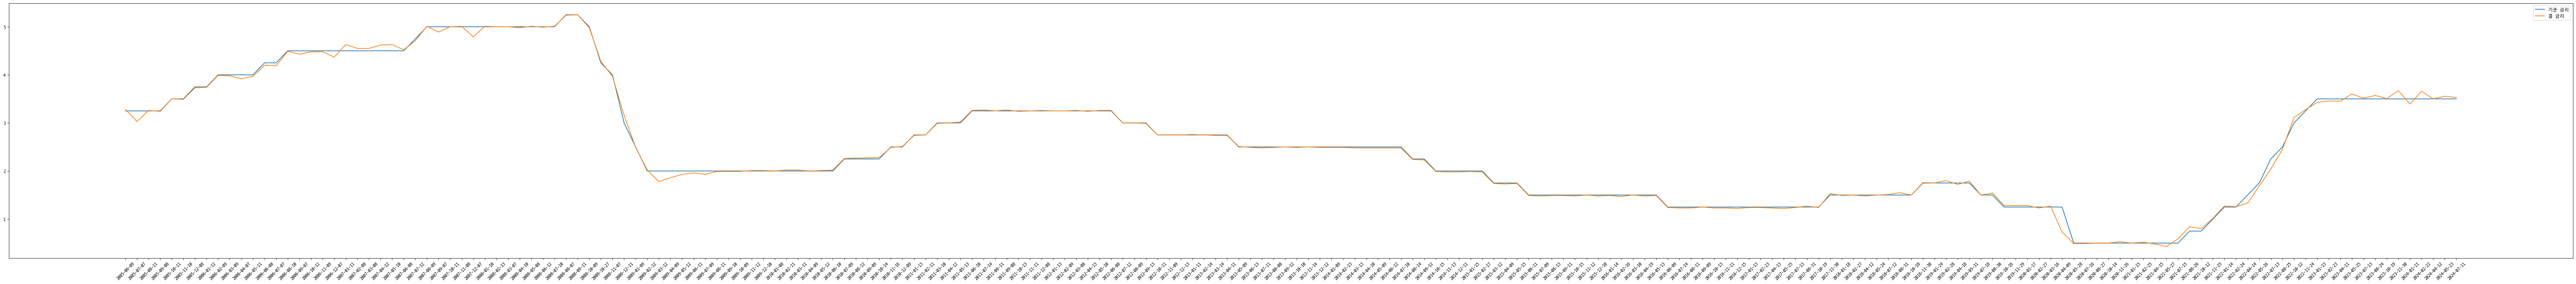

In [11]:
plt.rc('font', family='D2Coding')
plt.figure(figsize=(100, 10))
plt.plot(base_rate['announce_date'], base_rate['기준금리'], label='기준 금리')
plt.plot(call_rate['announce_date'], call_rate['rate'], label='콜 금리')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [12]:
mpc_df = pd.read_csv("C:/Users/SesacPython/Downloads/mpc_df.csv")

# 빈 리스트 삭제(결측치)
mpc_df.drop(index = mpc_df[mpc_df.content_token == "[]"].index, inplace = True)

# 날짜 범위 맞츰
mpc_df = mpc_df.iloc[:-1]

# 날짜 오타 수정
mpc_df.iloc[291,0] = 20200910
mpc_df.iloc[292,0] = 20200924

In [13]:
# 의사록 announce_date 설정

mpc_pol_date = {}
min_anndate_list = []

for d in mpc_df['date']:
    valid_anndates = [a for a in annli if a >= d]
    if valid_anndates:
        min_anndate_list.append(min(valid_anndates))
    # else:
    #     min_anndate_list.append(None)

mpc_df['ann'] = min_anndate_list
mpc_df['ann'] = mpc_df['ann'].astype(int)

In [14]:
# 의사록 기반 극성 예측

mpc_by_pol = mpc_df.groupby(['ann', 'polarity']).agg('count').drop(columns='date')

mpc_pol_date = {ann:[0,0,0] for ann in annli}
for ann in annli:
    for pol in mpc_by_pol.loc[ann].index:
        mpc_pol_date[ann][pol] += mpc_by_pol.loc[ann].loc[pol, 'content_token']

countli = list(mpc_pol_date.values())

mpc_pol_li = []
for li in countli:
    if (max(li) == li[1]) and (max(li) == li[2]):
        mpc_pol_li.append(0)
    elif (max(li) == li[0]) and (max(li) == li[1]):
        mpc_pol_li.append(1)
    elif (max(li) == li[0]) and (max(li) == li[2]):
        mpc_pol_li.append(2)
    else:
        mpc_pol_li.append(np.argmax(li))

base_rate['mpc_pol_pred'] = mpc_pol_li

In [15]:
# 실제 기준금리 상승/동결/하락 & 예측값 비교 (맞춘 개수, 틀린 개수) (의사록 기반 예측)
y = list(base_rate.polarity)
y_pred = list(base_rate.mpc_pol_pred)

pred_by_mpc_correct_count = 0
pred_by_mpc_incorrect_count = 0
for i in range(len(y)):
    if y[i] == y_pred[i]:
        pred_by_mpc_correct_count += 1
    else:
        pred_by_mpc_incorrect_count += 1

pred_by_mpc_correct_count, pred_by_mpc_incorrect_count

(90, 112)

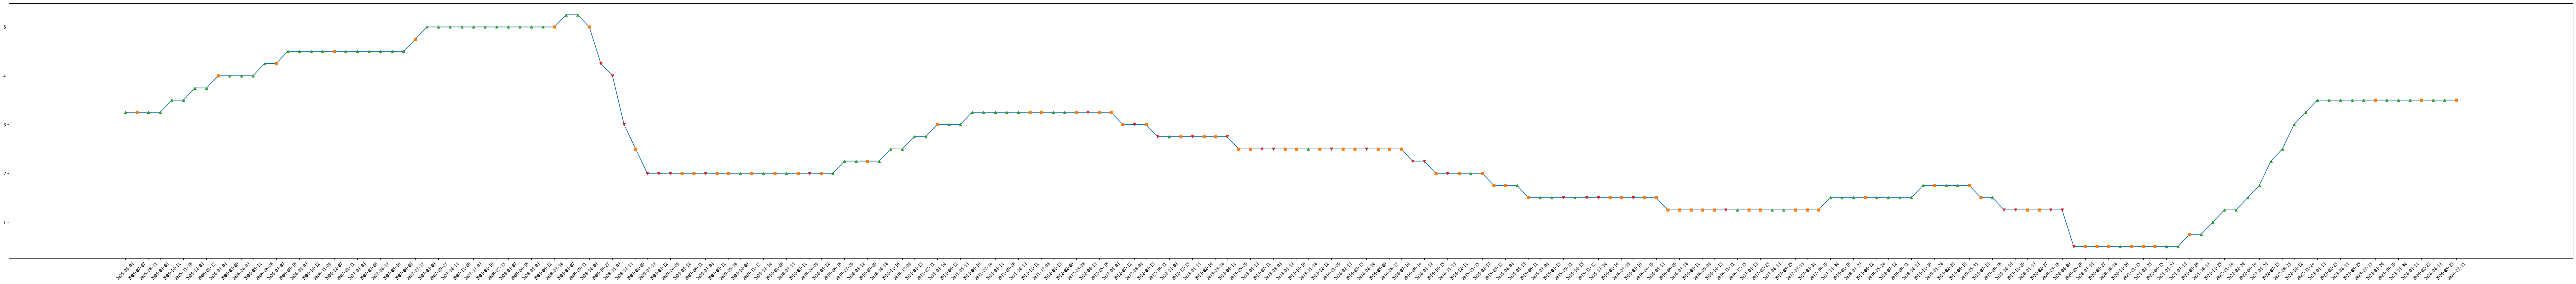

In [16]:
# 의사록 기반 예측
markers = {0: 's', 1: '^', 2: 'v'}

plt.figure(figsize=(100,10))
plt.plot(base_rate['announce_date'], base_rate['기준금리'])
plt.xticks(rotation=45)
for pred_value, marker in markers.items():
    subset = base_rate[base_rate['mpc_pol_pred'] == pred_value]
    plt.plot(subset['announce_date'], subset['기준금리'], marker=marker, linestyle='', label=f'pred = {pred_value}')

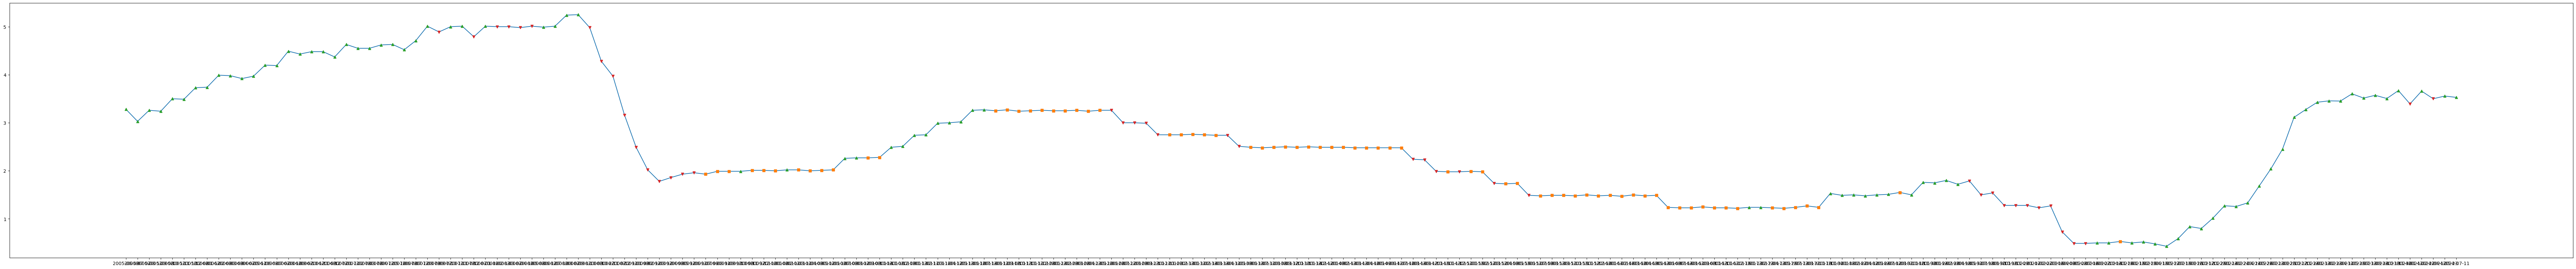

In [ ]:
# 콜 금리와 비교
# markers = {0: 's', 1: '^', 2: 'v'}

# plt.figure(figsize=(100,10))
# plt.plot(call_rate['announce_date'], call_rate['rate'])
# for pred_value, marker in markers.items():
#     subset = call_rate[call_rate['pred'] == pred_value]
#     plt.plot(subset['announce_date'], subset['rate'], marker=marker, linestyle='', label=f'pred = {pred_value}')

In [17]:
# 실제 기준금리 상승/동결/하락 & 예측값 비교 (맞춘 개수, 틀린 개수) (뉴스&채권분석보고서 기반 예측)
y2 = list(base_rate.polarity)
y2_pred = list(base_rate.pred)
pred_by_news_correct_count = 0
pred_by_news_incorrect_count = 0
for i in range(len(y2)):
    if y2[i] == y2_pred[i]:
        pred_by_news_correct_count += 1
    else:
        pred_by_news_incorrect_count += 1

pred_by_news_correct_count, pred_by_news_incorrect_count

(111, 91)

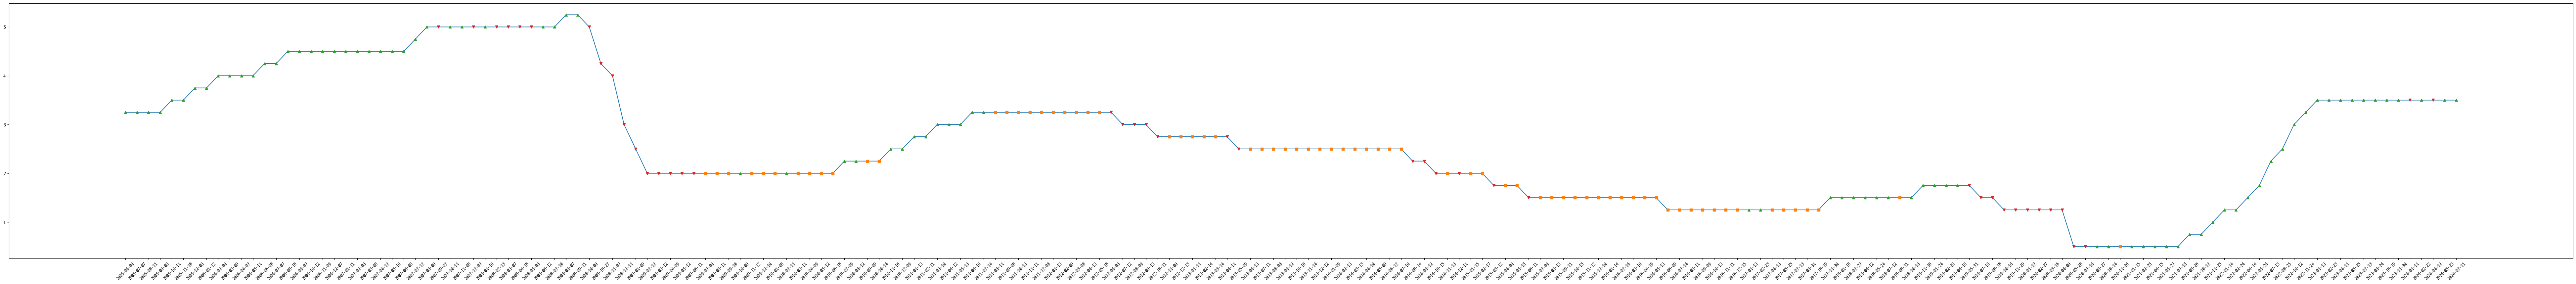

In [18]:
# 뉴스기사 & 본드 기반 예측
markers = {0: 's', 1: '^', 2: 'v'}

plt.figure(figsize=(100,10))
plt.plot(base_rate['announce_date'], base_rate['기준금리'])
plt.xticks(rotation=45)
for pred_value, marker in markers.items():
    subset = base_rate[base_rate['pred'] == pred_value]
    plt.plot(subset['announce_date'], subset['기준금리'], marker=marker, linestyle='', label=f'pred = {pred_value}')